In [103]:
import tensorflow as tf
print(tf.__version__)


2.17.0


In [104]:
import pandas as pd

splits = {'train': 'plain_text/train-00000-of-00001.parquet', 'test': 'plain_text/test-00000-of-00001.parquet'}
train_df = pd.read_parquet("hf://datasets/fancyzhx/yelp_polarity/" + splits["train"])
test_df = pd.read_parquet("hf://datasets/fancyzhx/yelp_polarity/" + splits["test"])

In [105]:
print(train_df)
print(test_df)

                                                     text  label
0       Unfortunately, the frustration of being Dr. Go...      0
1       Been going to Dr. Goldberg for over 10 years. ...      1
2       I don't know what Dr. Goldberg was like before...      0
3       I'm writing this review to give you a heads up...      0
4       All the food is great here. But the best thing...      1
...                                                   ...    ...
559995  Ryan was as good as everyone on yelp has claim...      1
559996  Professional \nFriendly\nOn time AND affordabl...      1
559997  Phone calls always go to voicemail and message...      0
559998  Looks like all of the good reviews have gone t...      0
559999  Ryan Rocks! I called him this morning for some...      1

[560000 rows x 2 columns]
                                                    text  label
0      Contrary to other reviews, I have zero complai...      1
1      Last summer I had an appointment to get new ti...      0
2

In [106]:
# Check the shape of the DataFrames
print(f"Train Data Shape: {train_df.shape}")
print(f"Test Data Shape: {test_df.shape}")

Train Data Shape: (560000, 2)
Test Data Shape: (38000, 2)


In [107]:
# Display the first few rows to verify the content
print(train_df.head())
print(test_df.head())

                                                text  label
0  Unfortunately, the frustration of being Dr. Go...      0
1  Been going to Dr. Goldberg for over 10 years. ...      1
2  I don't know what Dr. Goldberg was like before...      0
3  I'm writing this review to give you a heads up...      0
4  All the food is great here. But the best thing...      1
                                                text  label
0  Contrary to other reviews, I have zero complai...      1
1  Last summer I had an appointment to get new ti...      0
2  Friendly staff, same starbucks fair you get an...      1
3  The food is good. Unfortunately the service is...      0
4  Even when we didn't have a car Filene's Baseme...      1


In [108]:
print(train_df.columns)

Index(['text', 'label'], dtype='object')


In [109]:
# Check for null values in the train and test DataFrames
train_nulls = train_df.isnull().sum()
test_nulls = test_df.isnull().sum()

print("Null values in train data:")
print(train_nulls)

print("\nNull values in test data:")
print(test_nulls)

Null values in train data:
text     0
label    0
dtype: int64

Null values in test data:
text     0
label    0
dtype: int64


In [110]:
# Check for duplicates in the train and test DataFrames
train_duplicates = train_df.duplicated().sum()
test_duplicates = test_df.duplicated().sum()

print(f"\nNumber of duplicate rows in train data: {train_duplicates}")
print(f"Number of duplicate rows in test data: {test_duplicates}")


Number of duplicate rows in train data: 0
Number of duplicate rows in test data: 0


In [111]:
# Summary statistics for text length
train_df['text_length'] = train_df['text'].apply(len)
print(train_df['text_length'].describe())

count    560000.000000
mean        726.497923
std         669.844273
min           1.000000
25%         279.000000
50%         528.000000
75%         947.000000
max        5273.000000
Name: text_length, dtype: float64


In [112]:
# Distribution of labels in the training and test datasets
print("Label distribution in train data:")
print(train_df['label'].value_counts())

Label distribution in train data:
label
0    280000
1    280000
Name: count, dtype: int64


In [113]:
print("\nLabel distribution in test data:")
print(test_df['label'].value_counts())


Label distribution in test data:
label
1    19000
0    19000
Name: count, dtype: int64


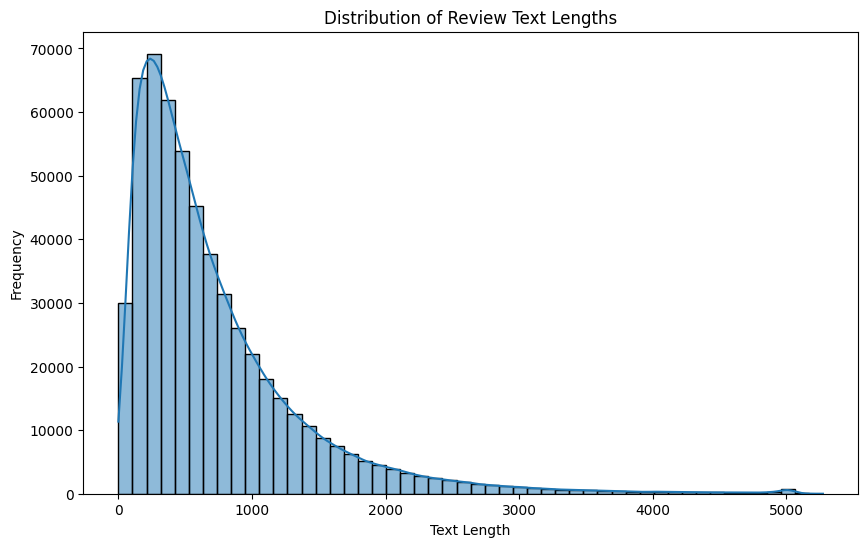

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(train_df['text_length'], bins=50, kde=True)
plt.title('Distribution of Review Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [115]:
# Correlation between text length and label
correlation = train_df[['text_length', 'label']].corr()
print("Correlation between text length and sentiment label:")
print(correlation)

Correlation between text length and sentiment label:
             text_length     label
text_length     1.000000 -0.140875
label          -0.140875  1.000000


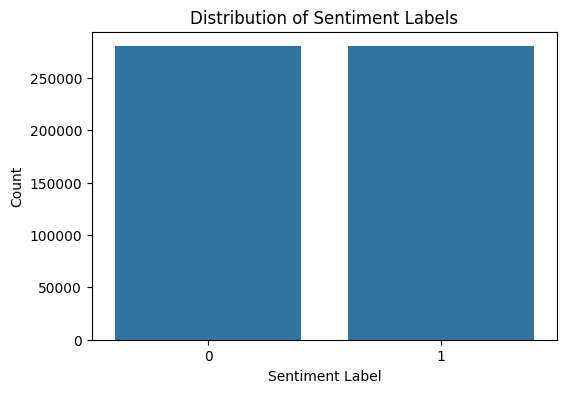

In [116]:
# Bar plot for label distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=train_df)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

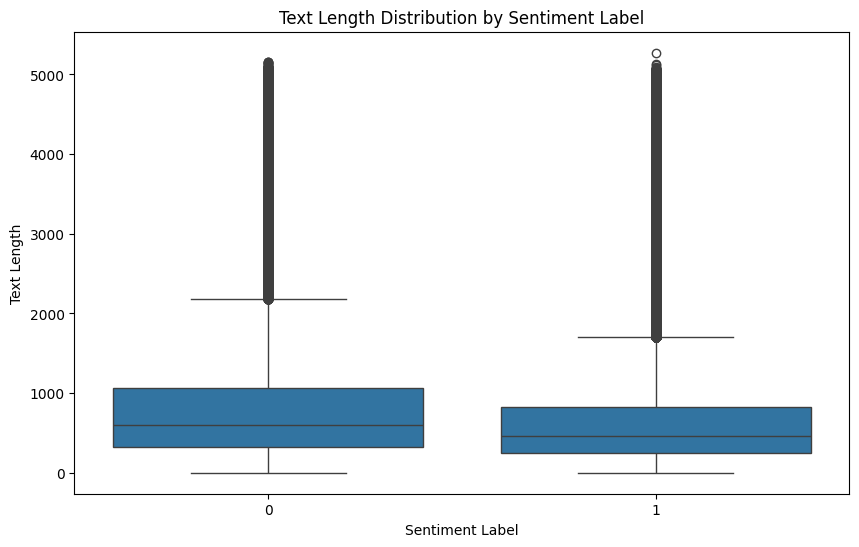

In [117]:
# Box plot for text length by label
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='text_length', data=train_df)
plt.title('Text Length Distribution by Sentiment Label')
plt.xlabel('Sentiment Label')
plt.ylabel('Text Length')
plt.show()

In [118]:
# Limit the train to the first 10,000 rows
train_df = train_df[:2000]
print(f"Train Data Shape after limiting: {train_df.shape}")


Train Data Shape after limiting: (2000, 3)


In [119]:
# Check the column names and first few rows
print(train_df.columns)

# Display the first few rows of the DataFrame
print(train_df.head())

Index(['text', 'label', 'text_length'], dtype='object')
                                                text  label  text_length
0  Unfortunately, the frustration of being Dr. Go...      0          643
1  Been going to Dr. Goldberg for over 10 years. ...      1          495
2  I don't know what Dr. Goldberg was like before...      0         1143
3  I'm writing this review to give you a heads up...      0         1050
4  All the food is great here. But the best thing...      1          429


In [120]:
# Drop the 'text_length' column and keep only 'text' and 'label'
train_df = train_df[['text', 'label']]

# Verify the new shape and columns
print(f"Train Data Shape after removing 'text_length': {train_df.shape}")
print(train_df.head())


Train Data Shape after removing 'text_length': (2000, 2)
                                                text  label
0  Unfortunately, the frustration of being Dr. Go...      0
1  Been going to Dr. Goldberg for over 10 years. ...      1
2  I don't know what Dr. Goldberg was like before...      0
3  I'm writing this review to give you a heads up...      0
4  All the food is great here. But the best thing...      1


In [121]:
test_df.shape

(38000, 2)

In [122]:
# Limit the test DataFrame to the first 5,000 rows
test_df = test_df[:500]

# Verify the new shape of the test DataFrame
print(f"Test Data Shape after limiting: {test_df.shape}")
print(test_df.head())


Test Data Shape after limiting: (500, 2)
                                                text  label
0  Contrary to other reviews, I have zero complai...      1
1  Last summer I had an appointment to get new ti...      0
2  Friendly staff, same starbucks fair you get an...      1
3  The food is good. Unfortunately the service is...      0
4  Even when we didn't have a car Filene's Baseme...      1


In [123]:
# Install required libraries if not already installed
!pip install transformers tensorflow


In [124]:
import tensorflow as tf
from transformers import DistilBertTokenizer

# Load the DistilBERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

In [125]:
# Tokenize the text data
def tokenize_function(texts):
    return tokenizer(
        texts.tolist(),
        padding='max_length',  # Pad to max length
        truncation=True,       # Truncate to max length
        max_length=128,        # Max length for BERT
        return_tensors='tf'    # Return as TensorFlow tensors
    )

In [126]:
# Tokenize the train and test data
train_encodings = tokenize_function(train_df['text'])
test_encodings = tokenize_function(test_df['text'])

In [127]:
# Convert labels to TensorFlow tensors
train_labels = tf.convert_to_tensor(train_df['label'].values)
test_labels = tf.convert_to_tensor(test_df['label'].values)

In [128]:
# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), test_labels))

# Verify the dataset structure
for batch in train_dataset.take(1):
    print(batch)

({'input_ids': <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([  101,  6854,  1010,  1996,  9135,  1997,  2108,  2852,  1012,
       18522,  1005,  1055,  5776,  2003,  1037,  9377,  1997,  1996,
        3325,  1045,  1005,  2310,  2018,  2007,  2061,  2116,  2060,
        7435,  1999, 16392,  1011,  1011,  2204,  3460,  1010,  6659,
        3095,  1012,  2009,  3849,  2008,  2010,  3095,  3432,  2196,
        6998,  1996,  3042,  1012,  2009,  2788,  3138,  1016,  2847,
        1997,  5567,  4214,  2000,  2131,  2019,  3437,  1012,  2040,
        2038,  2051,  2005,  2008,  2030,  4122,  2000,  3066,  2007,
        2009,  1029,  1045,  2031,  2448,  2046,  2023,  3291,  2007,
        2116,  2060,  7435,  1998,  1045,  2074,  2123,  1005,  1056,
        2131,  2009,  1012,  2017,  2031,  2436,  3667,  1010,  2017,
        2031,  5022,  2007,  2966,  3791,  1010,  2339,  3475,  1005,
        1056,  3087, 10739,  1996,  3042,  1029,  2009,  1005,  1055,
        4297, 25377,  2890, 1

In [129]:
from transformers import TFDistilBertForSequenceClassification

# Load pre-trained DistilBERT model for sequence classification
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels =2)

# Display the model summary
model.summary()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

Model: "tf_distil_bert_for_sequence_classification_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMa  multiple                  66362880  
 inLayer)                                                        
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
 dropout_177 (Dropout)       multiple                  0 (unused)
                                                                 
Total params: 66955010 (255.41 MB)
Trainable params: 66955010 (255.41 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [130]:
# Convert labels to TensorFlow tensors (integer encoding for binary classification)
train_labels = tf.convert_to_tensor(train_df['label'].values, dtype=tf.int64)
test_labels = tf.convert_to_tensor(test_df['label'].values, dtype=tf.int64)

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), test_labels))


In [131]:
from tensorflow.keras.optimizers import Adam


In [132]:
# Compile the model
model.compile(
    optimizer="Adam",
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy']
)


In [133]:
for batch in train_dataset.take(1):
    inputs, labels = batch
    print("Inputs:", inputs)
    print("Labels:", labels)
    print("Inputs shape:", {k: v.shape for k, v in inputs.items()})
    print("Labels shape:", labels.shape)


Inputs: {'input_ids': <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([  101,  6854,  1010,  1996,  9135,  1997,  2108,  2852,  1012,
       18522,  1005,  1055,  5776,  2003,  1037,  9377,  1997,  1996,
        3325,  1045,  1005,  2310,  2018,  2007,  2061,  2116,  2060,
        7435,  1999, 16392,  1011,  1011,  2204,  3460,  1010,  6659,
        3095,  1012,  2009,  3849,  2008,  2010,  3095,  3432,  2196,
        6998,  1996,  3042,  1012,  2009,  2788,  3138,  1016,  2847,
        1997,  5567,  4214,  2000,  2131,  2019,  3437,  1012,  2040,
        2038,  2051,  2005,  2008,  2030,  4122,  2000,  3066,  2007,
        2009,  1029,  1045,  2031,  2448,  2046,  2023,  3291,  2007,
        2116,  2060,  7435,  1998,  1045,  2074,  2123,  1005,  1056,
        2131,  2009,  1012,  2017,  2031,  2436,  3667,  1010,  2017,
        2031,  5022,  2007,  2966,  3791,  1010,  2339,  3475,  1005,
        1056,  3087, 10739,  1996,  3042,  1029,  2009,  1005,  1055,
        4297, 25377,  

In [134]:
import tensorflow as tf

def create_tf_dataset(encodings, labels):
    dataset = tf.data.Dataset.from_tensor_slices((dict(encodings), labels))
    return dataset.map(lambda x, y: (x, tf.reshape(y, (-1,))))

# Tokenize the train and test data
train_encodings = tokenize_function(train_df['text'])
test_encodings = tokenize_function(test_df['text'])

# Convert labels to TensorFlow tensors
train_labels = tf.convert_to_tensor(train_df['label'].values, dtype=tf.int64)
test_labels = tf.convert_to_tensor(test_df['label'].values, dtype=tf.int64)

# Create TensorFlow datasets
train_dataset = create_tf_dataset(train_encodings, train_labels)
test_dataset = create_tf_dataset(test_encodings, test_labels)


In [135]:
from transformers import TFDistilBertForSequenceClassification
from tensorflow.keras.optimizers import Adam

# Initialize the model with num_labels=2 for binary classification
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

# Compile the model
model.compile(
    optimizer="Adam",
    loss='sparse_categorical_crossentropy',  # Suitable for integer-encoded labels
    metrics=['accuracy']
)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [136]:
# Define training parameters
batch_size = 16
epochs = 3

# Train the model
history = model.fit(
    train_dataset.shuffle(10000).batch(batch_size),
    validation_data=test_dataset.batch(batch_size),
    epochs=epochs
)

# Evaluate the model
loss, accuracy = model.evaluate(test_dataset.batch(batch_size))
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/3
125/125 [==============================] - 1558s 12s/step - loss: 0.8542 - accuracy: 0.5120 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/3
125/125 [==============================] - 1526s 12s/step - loss: 0.6931 - accuracy: 0.4365 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/3
32/32 [==============================] - 103s 3s/step - loss: 0.6931 - accuracy: 0.5000
Test Loss: 0.6931
Test Accuracy: 50.00%


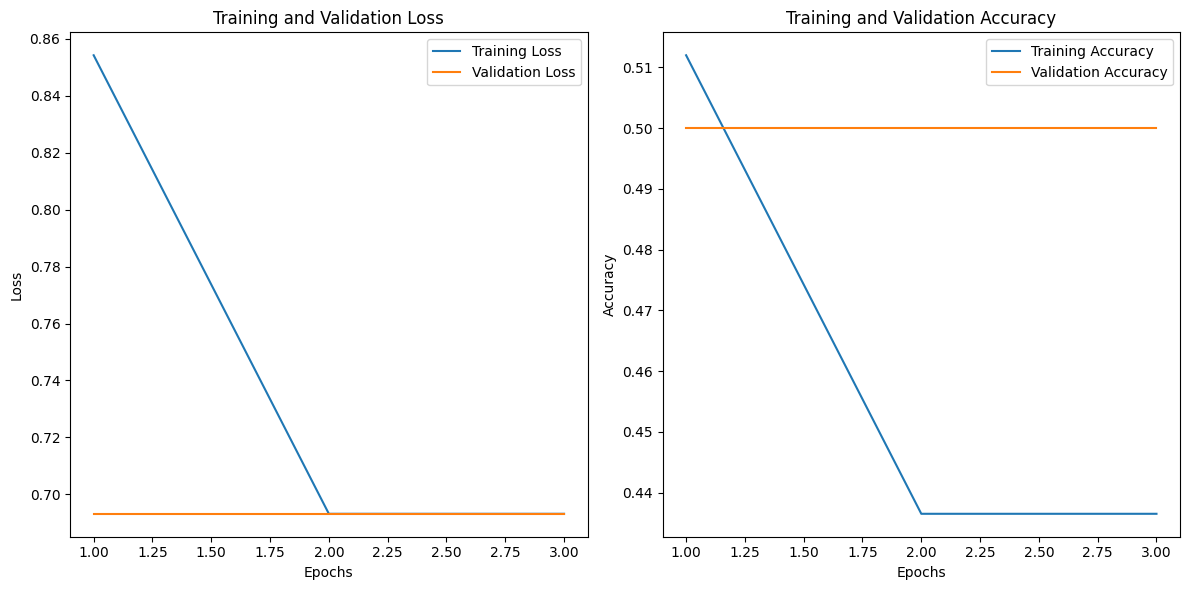

In [137]:
# Extract metrics from the history object
history_dict = history.history
epochs_range = range(1, len(history_dict['loss']) + 1)

# Plot loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history_dict['loss'], label='Training Loss')
plt.plot(epochs_range, history_dict['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history_dict['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()